# Climate datasets


**Description & purpose**: This notebook is designed to introduce the user to model data held within the CMIP6 STAC and to suggest simple ways to visualise the information held within the NetCDF files that are accessed through the STAC asset URLs.

**Author(s)**: Alastair Graham

**Date created**: 2024-12-12

**Date last modified**: 2024-12-17

**Licence**: This file is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/). Any included code is released using the [BSD-2-Clause](https://www.tldrlegal.com/license/bsd-2-clause-license-freebsd) license.

<span style="font-size:0.75em;">
Copyright (c) , All rights reserved.</span>

<span style="font-size:0.75em;">
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:</span>

<span style="font-size:0.75em;">
Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.</span>

[WIP Icon Attribution]("https://www.flaticon.com/free-icons/work-in-progress")


# Introduction


The **Coupled Model Intercomparison Project Phase 6 (CMIP6)** is an international collaborative effort aimed at advancing our understanding of the Earth's climate system through standardised climate model experiments. It builds on the success of earlier phases of CMIP, providing a structured framework for comparing and improving climate models developed by research institutions worldwide. CMIP6 simulations include a wide range of scenarios, such as historical climate variations, future projections based on greenhouse gas emission trajectories, and experiments designed to isolate the effects of specific climate forcings (e.g. volcanic activity or solar variations). By providing consistent protocols and publicly available datasets, CMIP6 ensures that climate models can be systematically tested, benchmarked, and improved.

CMIP6 has a critical role in assessing the impacts of climate change and guiding global policy decisions and forms the scientific backbone for major climate assessments, such as those by the **Intergovernmental Panel on Climate Change (IPCC)**. The data generated by CMIP6 models underpin projections of global temperature rise, sea level changes, and the frequency and intensity of extreme weather events under different socioeconomic pathways. These insights are essential for governments, industries, and communities to make informed decisions about climate mitigation and adaptation strategies. CMIP6 also helps identify uncertainties in climate modeling, providing researchers with a roadmap for future model development. The EODH facilitates interdisciplinary research by providing open-access to the CMIP6 datasets. By fostering collaboration, transparency, and innovation, the EODH platform (and the CMIP6 data accessible through it) aspires to be a cornerstone of climate science.

The data is provided in the **NetCDF (Network Common Data Form)** file format, a widely used standard for storing, sharing, and analyzing scientific data, particularly in the geosciences and climate sciences. NetCDF is designed to handle large, multi-dimensional datasets, such as temperature, precipitation, and wind speed, across space and time. Its self-describing format allows metadata (e.g. variable names, units, and coordinate information) to be embedded directly within the file, making the data easily interpretable and portable across platforms. Climate scientists use NetCDF because it is highly efficient for storing gridded data, supports parallel I/O for high-performance computing, and is compatible with a range of software tools, including Python. Additionally, the ability to represent data on multiple dimensions (e.g., latitude, longitude, time, and height) and its compression capabilities make it indispensable for managing the massive datasets generated by climate models and observational systems.


In [2]:
# Notebook set-up

# Import the Python API Client
import pyeodh

# # Import data handling and visualisation packages
# import xarray as xr
# import matplotlib.pyplot as plt
# import numpy as np

# import geoviews as gv
# import geoviews.feature as gf
# from cartopy import crs

# # Parameterise geoviews
# gv.extension("bokeh", "matplotlib")

# Finding data


Information about the dataset we are interested in can be found [here](https://radiantearth.github.io/stac-browser/#/external/test.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/ceda-stac-catalogue/collections/cmip6/items/CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317?.asset=asset-data0001).


In [3]:
# Connect to the Hub
client = pyeodh.Client().get_catalog_service()

# Print a list of the collections held in the Resource Catalogue (their id and description).
# As the Resource Catalogue fills and development continues, the number of collections and the richness of their descriptions will increase
for collect in client.get_collections():
    print(f"- {collect.id}: {collect.description}")

- ukcp: UKCP
- sentinel2_ard: sentinel 2 ARD
- sentinel1: Sentinel 1
- sentinel-2-l2a: Global Sentinel-2 data from the Multispectral Instrument (MSI) onboard Sentinel-2
- sentinel-2-l1c: Global Sentinel-2 data from the Multispectral Instrument (MSI) onboard Sentinel-2
- sentinel-2-c1-l2a: Sentinel-2 Collection 1 L2A, data from the Multispectral Instrument (MSI) onboard Sentinel-2
- sentinel-1-grd: Sentinel-1 is a pair of Synthetic Aperture Radar (SAR) imaging satellites launched in 2014 and 2016 by the European Space Agency (ESA). Their 6 day revisit cycle and ability to observe through clouds makes this dataset perfect for sea and land monitoring, emergency response due to environmental disasters, and economic applications. This dataset represents the global Sentinel-1 GRD archive, from beginning to the present, converted to cloud-optimized GeoTIFF format.
- naip: The [National Agriculture Imagery Program](https://www.fsa.usda.gov/programs-and-services/aerial-photography/imagery-progr

In [11]:
# Connect to the Hub
client = pyeodh.Client().get_catalog_service()
cmip6 = client.get_catalog("supported-datasets/ceda-stac-catalogue").get_collection(
    "cmip6"
)

cmip6.extent.to_dict()
cmip6.get_item(
    "CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317"
)
item_search = client.search(
    # collections=["cmip6"],
    ids=[
        "CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317"
    ],
    limit=10,
)

In [14]:
for item in item_search:
    print(item.assets.keys())
    print(item.assets["data0001"].href)

dict_keys(['reference_file', 'data0001'])
https://dap.ceda.ac.uk/badc/cmip6/data/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp126/r1i1p1f1/day/pr/gn/v20210317/pr_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_22510101-23001231.nc


![](../img/wip.png){width=50px}

**To be added**

- for loop over item_search ,
- item_search.total_count if you just want a number of items found,
- you can also use slices to go through a limited number of results like so for it in item_search[0:10]:
- specific single item
  - item_search[1]


# Visualising data


To enable us to view the information held in an individual CMIP6 NetCDf file we are going to use [Geoviews](https://geoviews.org/). The GeoViews Python package is a high-level library designed for interactive visualization of geospatial data, and built on top of the HoloViews library. GeoViews simplifies the creation of dynamic and rich visualisations that integrate geographic elements such as maps, satellite imagery, and geospatial datasets. It supports seamless interaction with popular geospatial libraries such as `cartopy`, GeoPandas and Shapely. GeoViews enables the overlaying of data on maps, customisation of visual styles, and interactivity such as zooming and panning.

First we need to access the data file and open it using xarray.


In [ ]:
# For the purposes of this demo we'll download a relevant NetCDF file
!wget https://dap.ceda.ac.uk/badc/cmip6/data/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp126/r1i1p1f1/day/pr/gn/v20210317/pr_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_22510101-23001231.nc

In [2]:
# Path to the NetCDF file (replace with your file path)
# file_path = "/path/to/pr_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_22510101-23001231.nc"
file_path = (
    "/home/al/Downloads/pr_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_22510101-23001231.nc"
)
# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)

# Display the dataset summary
data

/home/al/miniforge3/envs/eodh/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/al/miniforge3/envs/eodh/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/al/miniforge3/envs/eodh/lib/python3.12/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 18262, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 146kB 2251-01-01 12:00:00 ... 2300-12-31 12:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 292kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    pr         (time, lat, lon) float32 2GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2021-03-17T01:55:47Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20210317
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/d0f83bdc-dad3-41e5-9bcc-84c8c1cd099c

From the above information (and the file name) we can see that the dataset contained in the NetCDF file is precipitation flux (pr). There are a large number of timeperiods that have been included in the file. We can plot a single slice of the data using GeoViews as laid out in the following code.


In [3]:
# select the first time step
oneframe = data.pr.isel(time=0)

# generate the image to show
figdata = gv.Dataset(oneframe, ["lon", "lat"], crs=crs.PlateCarree())
images = figdata.to(gv.Image)

# Plot
images.opts(cmap="viridis", colorbar=True, width=600, height=500) * gf.coastline

:Overlay
   .Image.I     :Image   [lon,lat]   (Precipitation)
   .Coastline.I :Feature   [Longitude,Latitude]

Interesting as this is, it doesn't tell us much at the moment. It would be useful if a user was able to move through the data and understand the changes in the supplied data as the time periods change. This is where Geoviews really helps.


In [4]:
# Clip the dataset to the first 50 time periods
data2 = data.isel(time=slice(0, 50))

In [5]:
# Create a Geoviews dataset and convert to the required format for visualisation
dataset = gv.Dataset(data2)
ensemble = dataset.to(gv.Image, ["lon", "lat"], "pr")

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (Precipitation)
      .Coastline.I :Feature   [Longitude,Latitude]
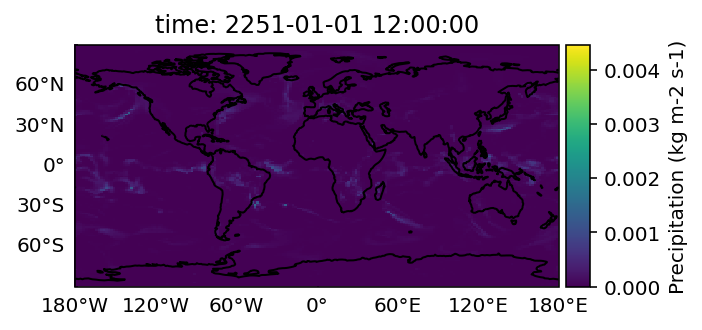
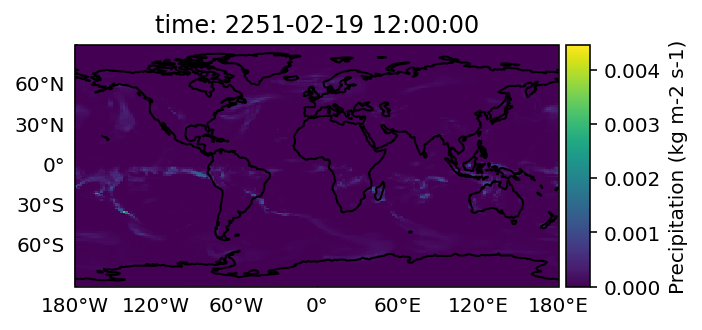
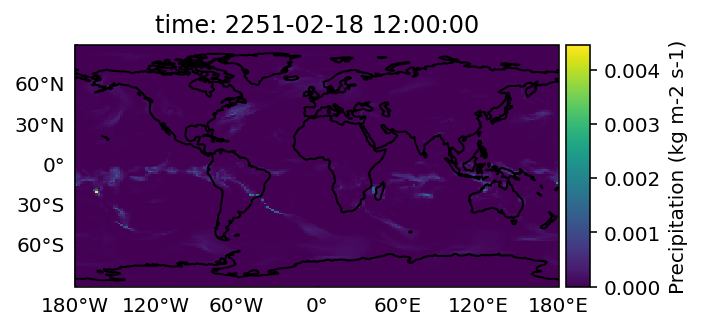
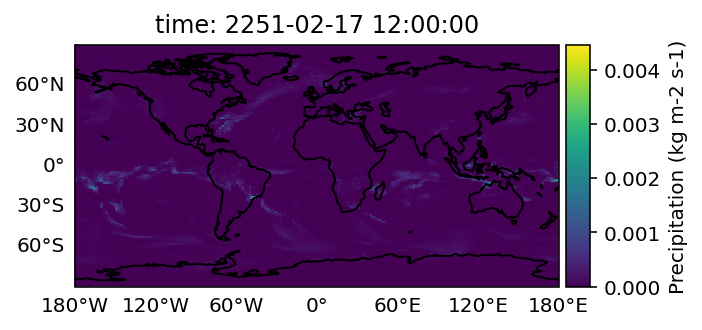
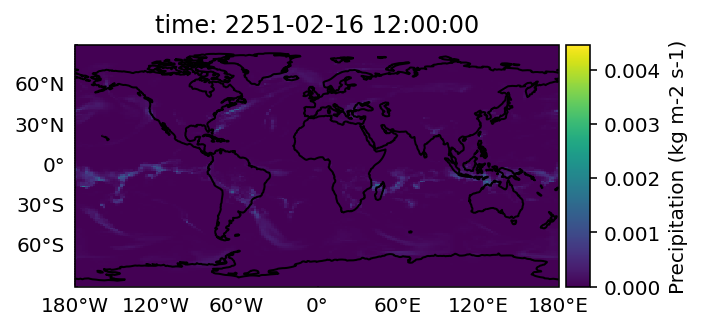
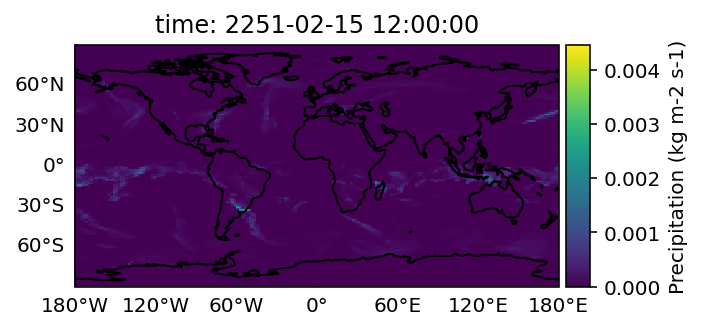
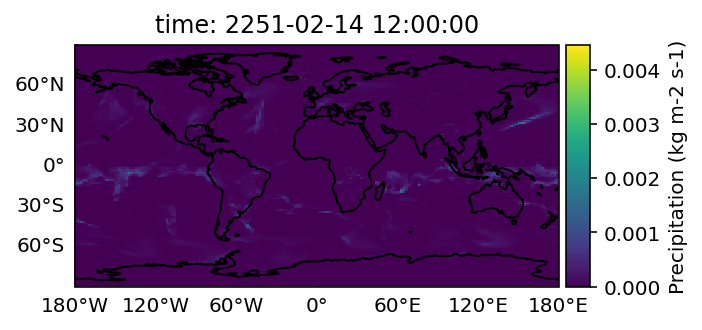
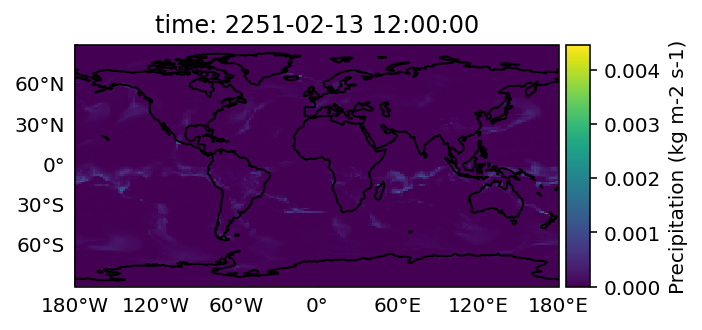
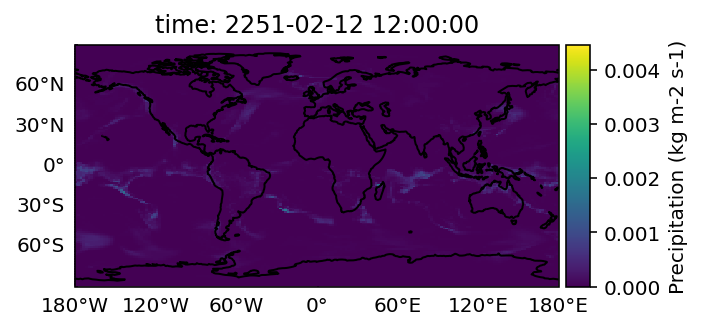
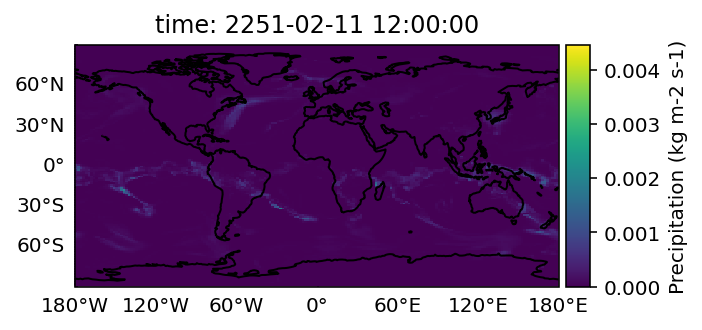
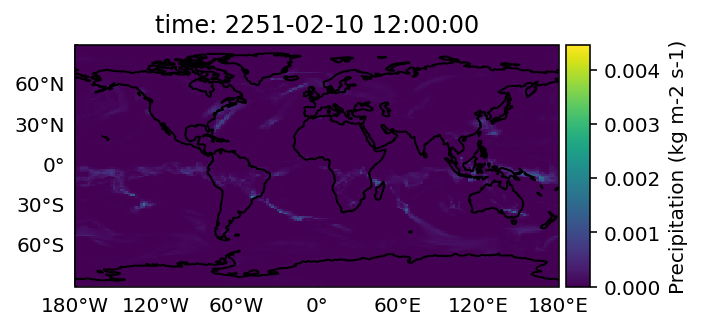
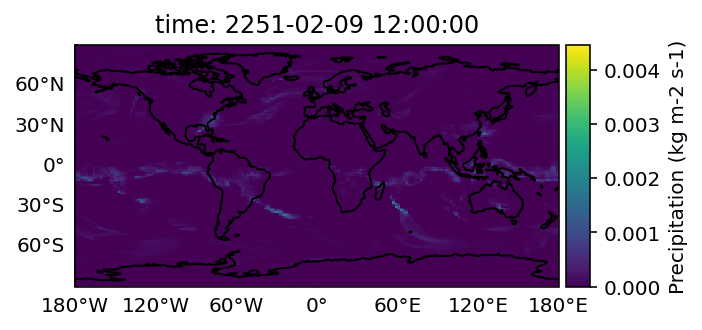
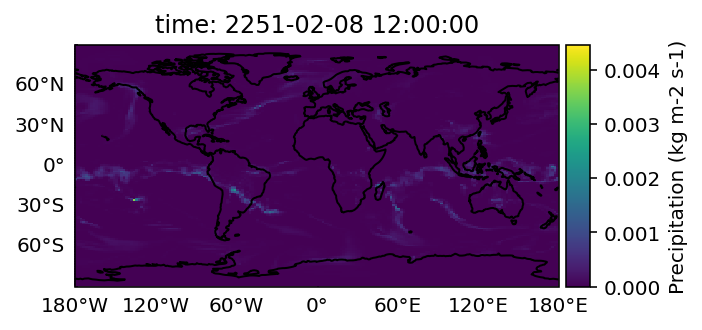
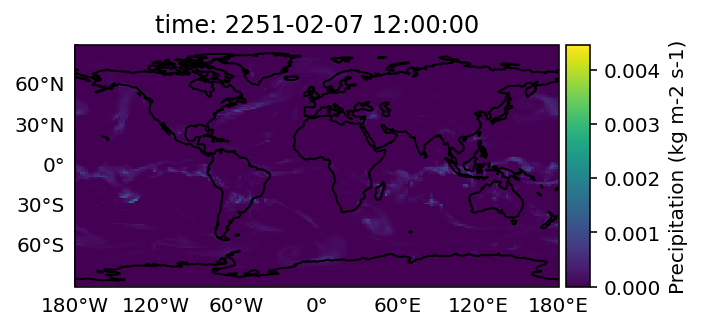
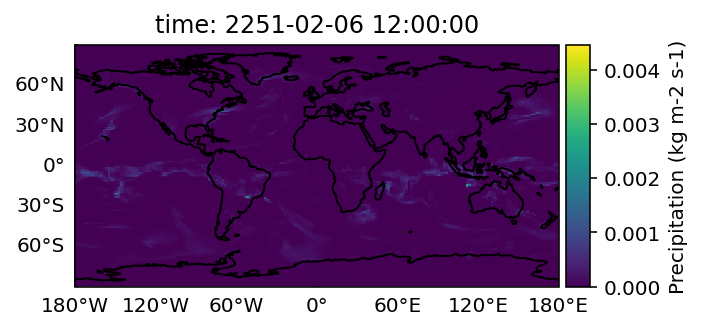
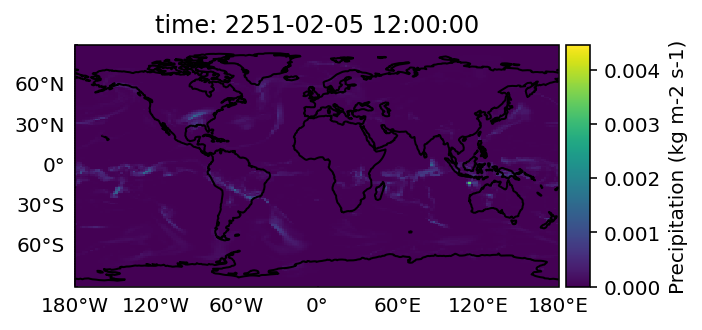
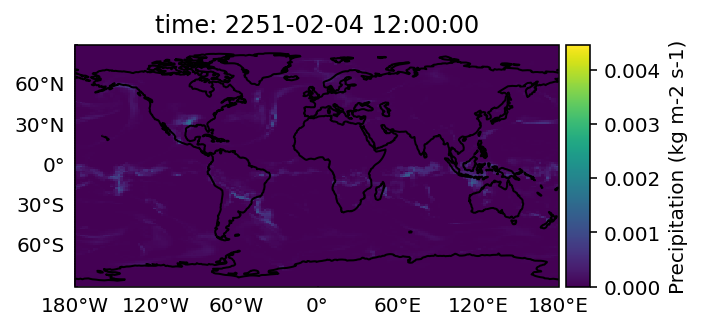
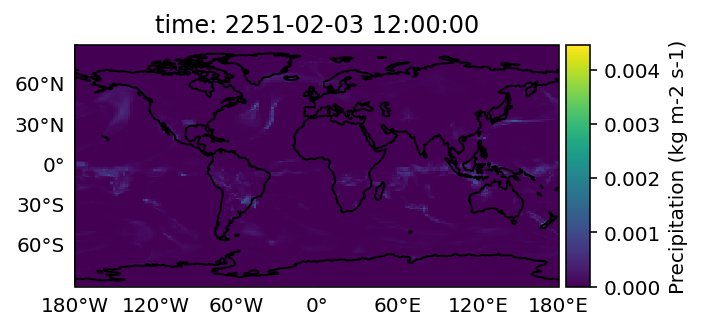
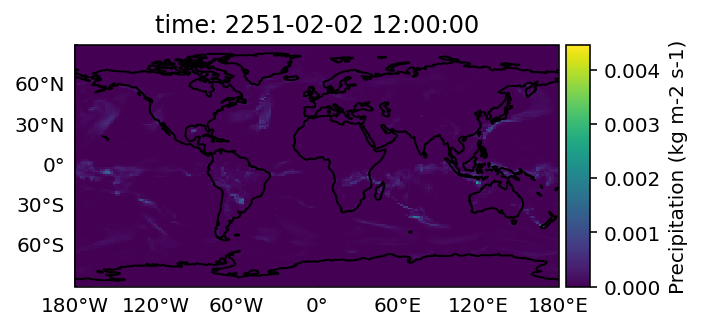
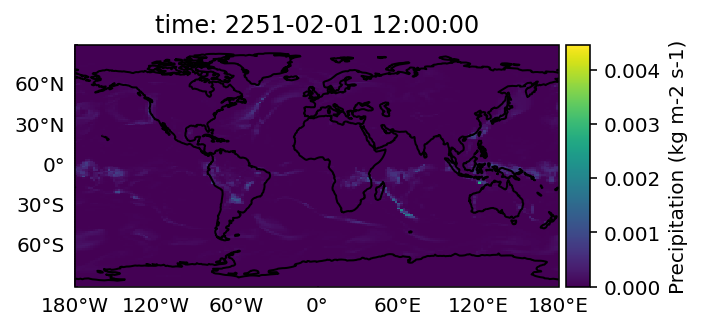
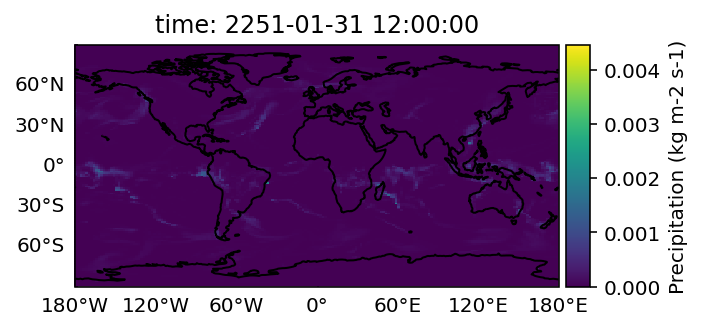
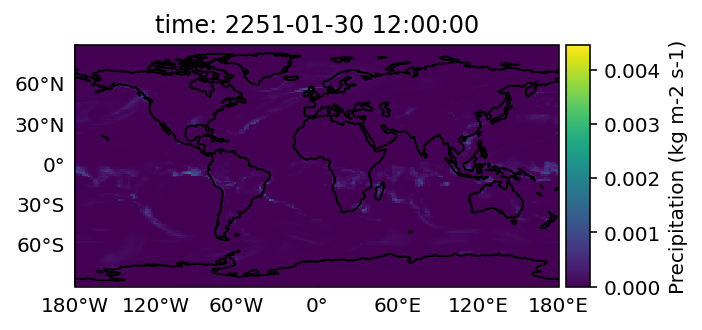
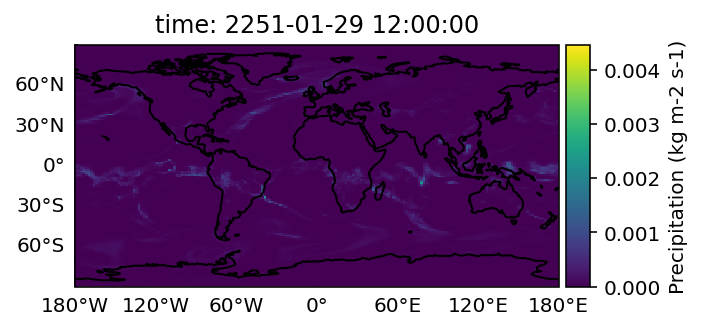
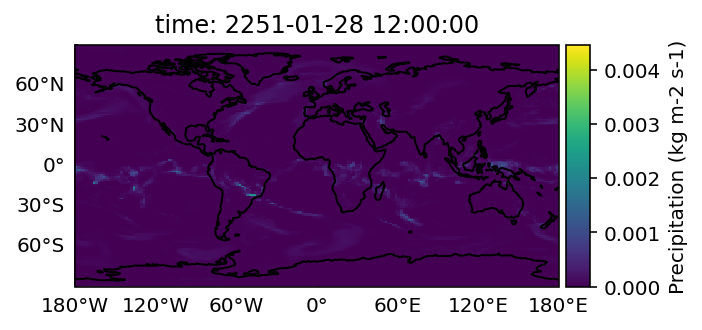
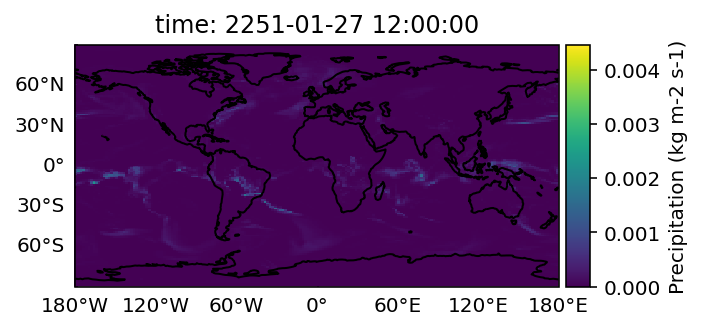
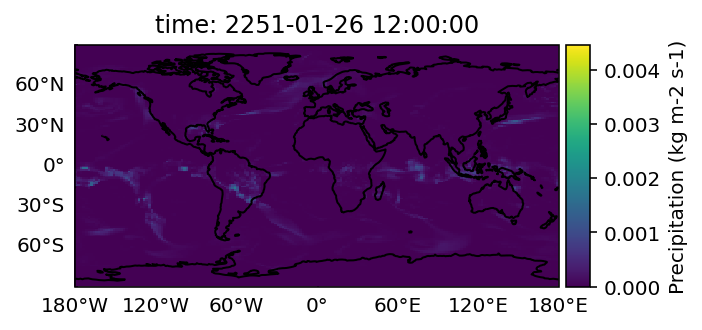
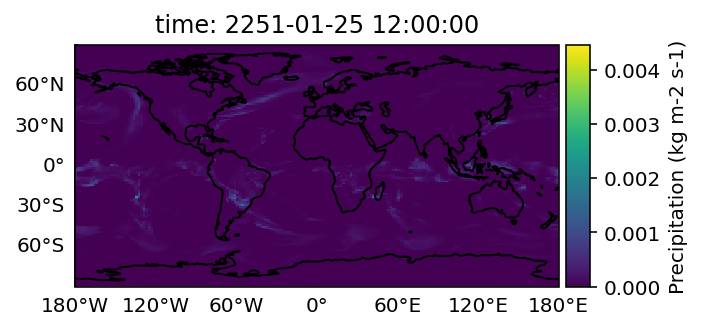
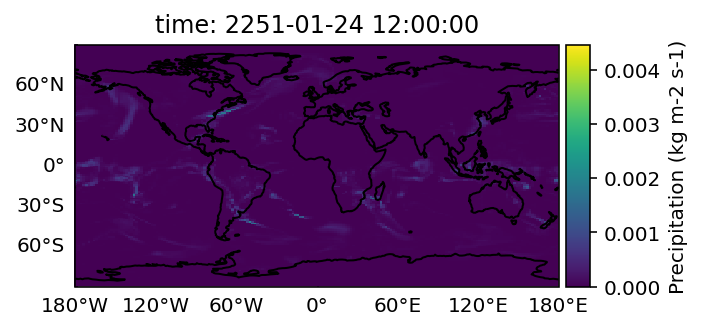
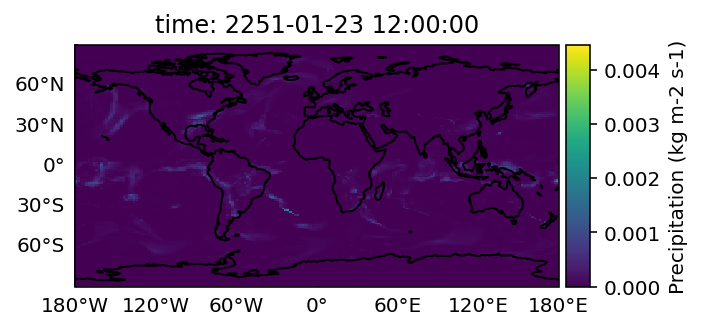
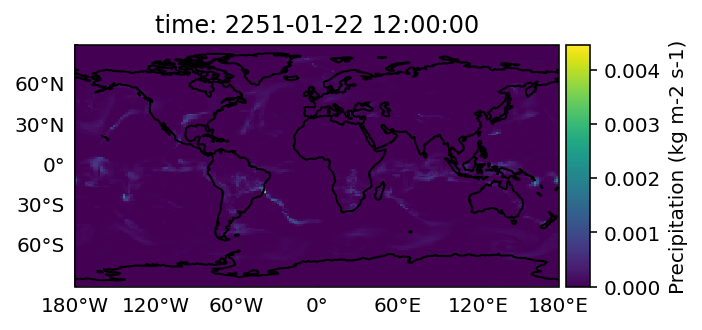
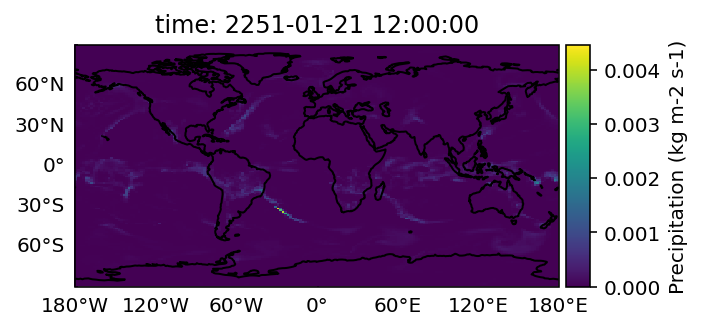
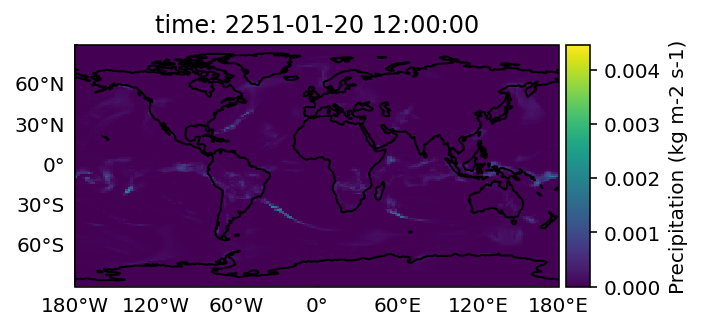
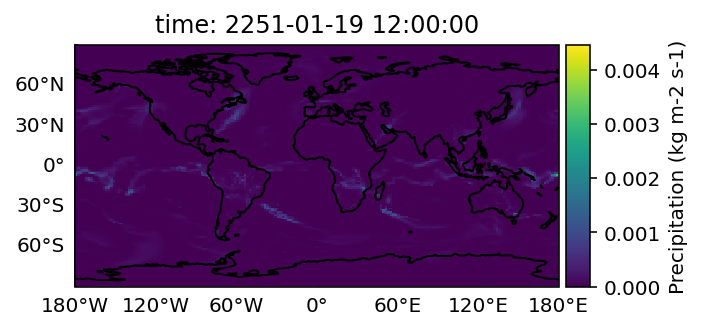
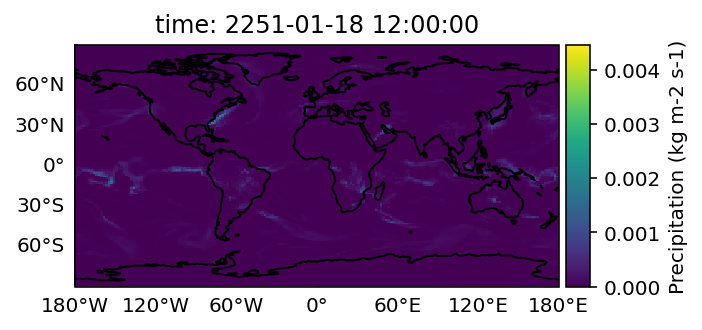
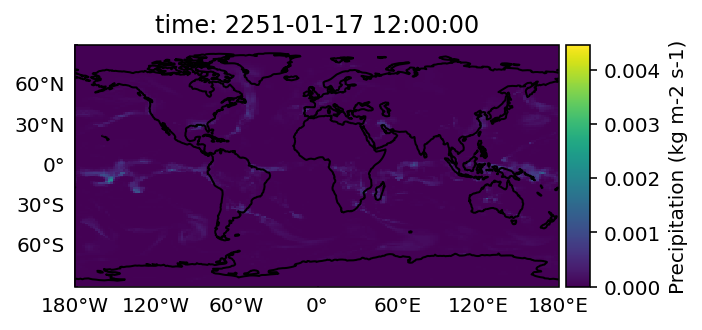
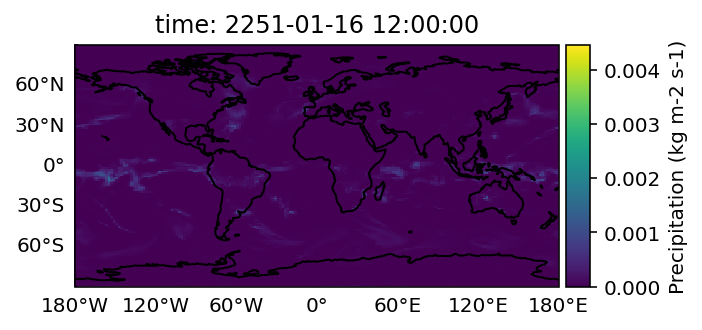
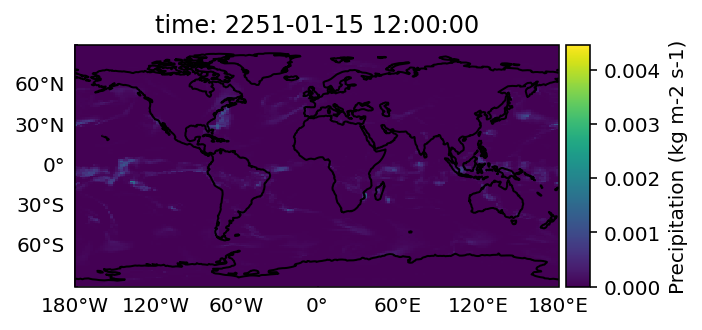
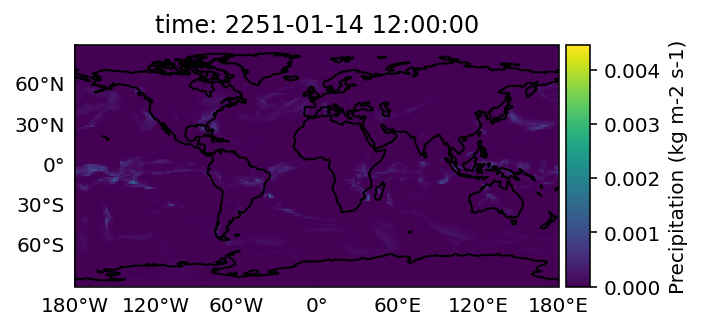
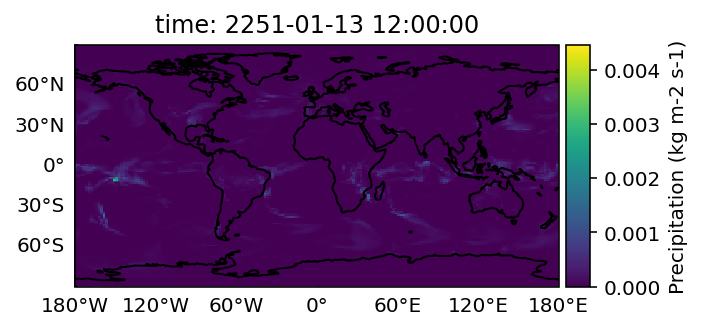
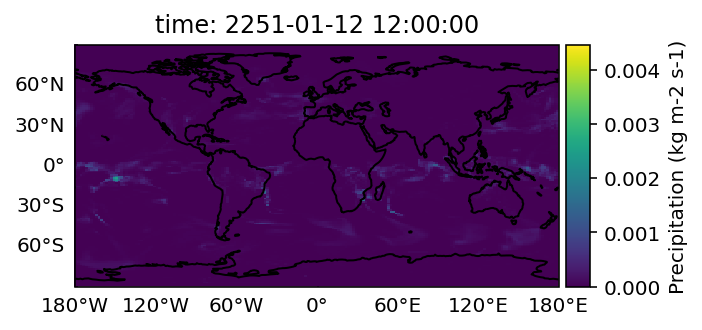
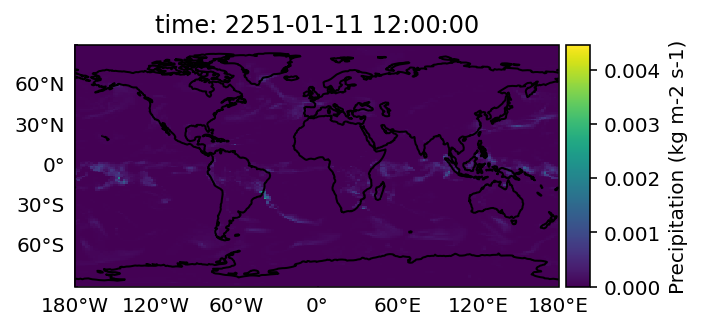
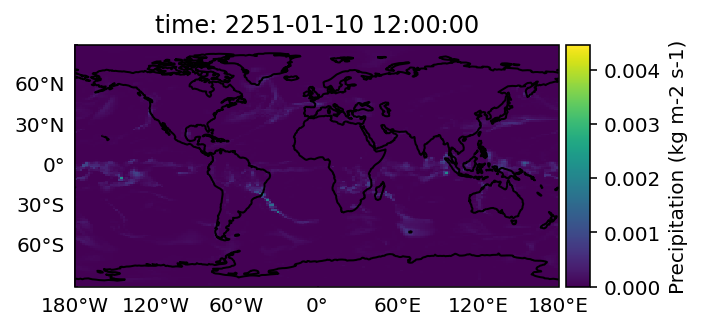
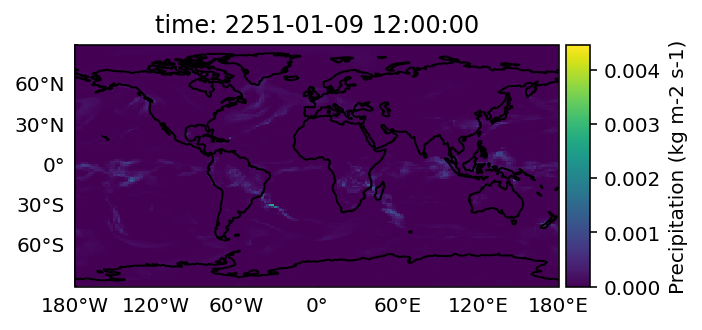
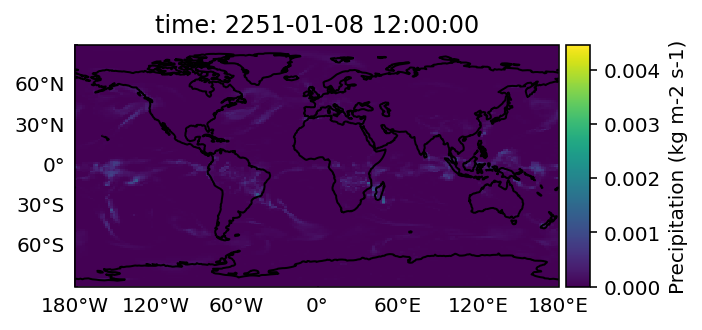
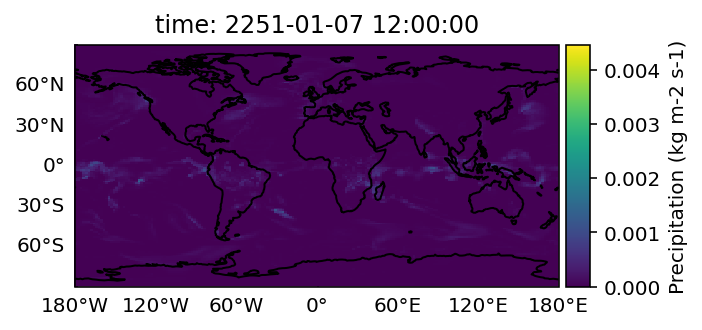
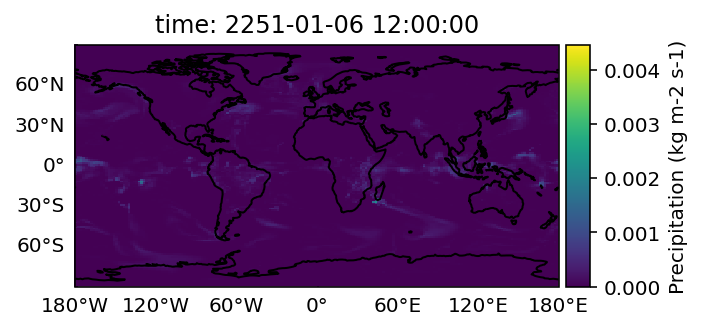
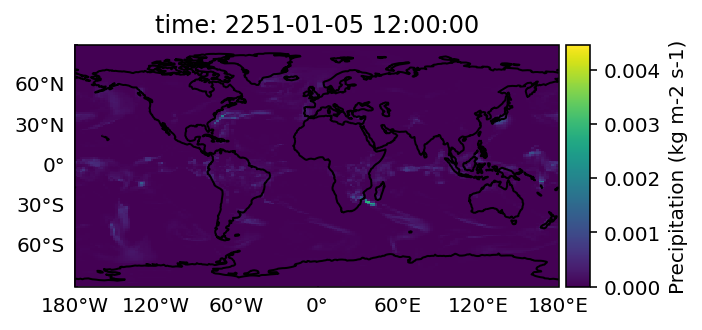
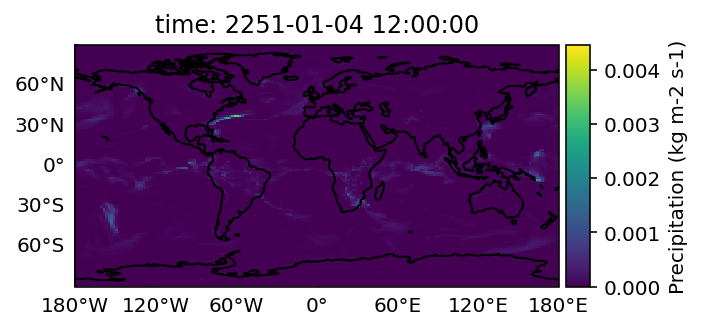
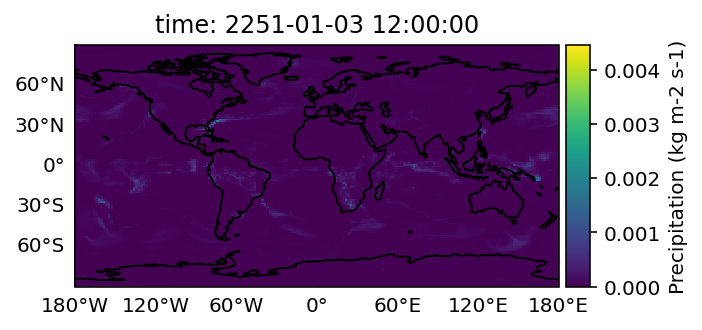
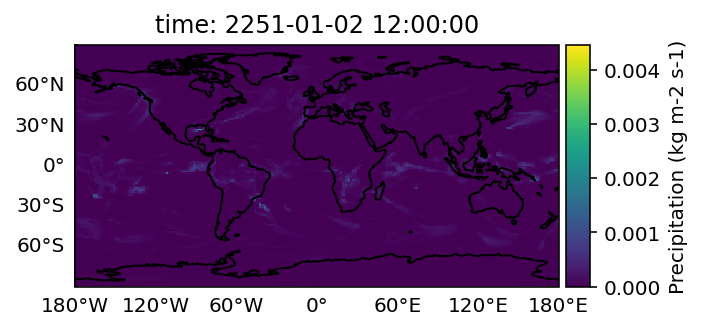
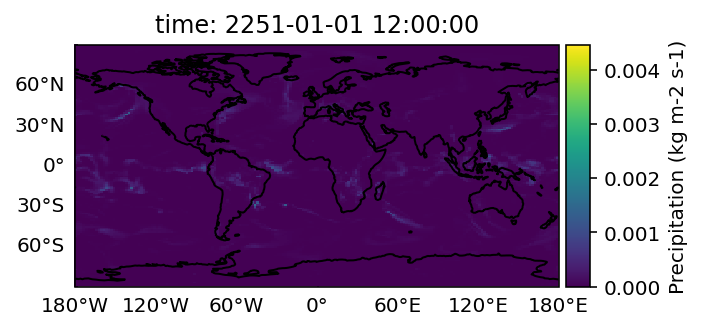

In [6]:
# Generate the interactive annimation
gv.output(
    ensemble.opts(cmap="viridis", colorbar=True, fig_size=120, backend="matplotlib")
    * gf.coastline(),
    backend="matplotlib",
    widget_location="top",
    max_frames=200,
)

Use the time slider above the figure to step through the spatial dataset held within the NetCDF file. Similar methods can be used with files containing different data. The Geoviews package and Holoviews suite of tools are very powerful when building interactive components to help scientists and users understand these complex datasets. If the colormap doesn't work for you alternatibves can be found [here](https://holoviews.org/user_guide/Colormaps.html).


In [7]:
# # Close the dataset to free resources
data.close()